In [4]:
#Value at Risk
#Step -1 import libraries


In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yf
from scipy.stats import norm


In [120]:
#Set time from to a certain number of years
years=15
endDate=dt.datetime.now()
startDate=endDate-dt.timedelta(days=365*years)

In [122]:
#create  a list of tickers
tickers=['SPY','BND','GLD','QQQ','VTI']


In [123]:
# Download the daily adjusted close price for the tickers
adj_close_df=pd.DataFrame()
for ticker in tickers:
    data=yf.download(ticker,start=startDate,end=endDate)
    adj_close_df[ticker]=data['Adj Close']
print(adj_close_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2010-01-04   86.026482  51.246948  109.800003   40.546177   43.747631
2010-01-05   86.254173  51.396748  109.699997   40.546177   43.915581
2010-01-06   86.314903  51.377171  111.510002   40.301620   43.976639
2010-01-07   86.679237  51.338112  110.820000   40.327827   44.159828
2010-01-08   86.967728  51.390244  111.370003   40.659752   44.304890
...                ...        ...         ...         ...         ...
2024-12-23  594.690002  71.747002  240.960007  522.869995  294.000000
2024-12-24  601.299988  71.849998  241.440002  529.960022  297.119995
2024-12-26  601.340027  71.900002  243.070007  529.599976  297.290009
2024-12-27  595.010010  71.750000  241.399994  522.559998  294.070007
2024-12-30  588.219971  72.029999  240.630005  515.609985  290.820007

[3773 rows x 5 columns]


In [124]:
# prompt: renove nan value from data frame and put there 0

adj_close_df.fillna(0, inplace=True)
adj_close_df

,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2010-01-04,86.026482,51.246948,109.800003,40.546177,43.747631
2010-01-05,86.254173,51.396748,109.699997,40.546177,43.915581
2010-01-06,86.314903,51.377171,111.510002,40.301620,43.976639
2010-01-07,86.679237,51.338112,110.820000,40.327827,44.159828
2010-01-08,86.967728,51.390244,111.370003,40.659752,44.304890
...,...,...,...,...,...
2024-12-23,594.690002,71.747002,240.960007,522.869995,294.000000
2024-12-24,601.299988,71.849998,241.440002,529.960022,297.119995
2024-12-26,601.340027,71.900002,243.070007,529.599976,297.290009


In [142]:
log_returns=np.log(adj_close_df/adj_close_df.shift(1))
log_returns=log_returns.dropna()
print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2010-01-05  0.002643  0.002919 -0.000911  0.000000  0.003832
2010-01-06  0.000704 -0.000381  0.016365 -0.006050  0.001389
2010-01-07  0.004212 -0.000761 -0.006207  0.000650  0.004157
2010-01-08  0.003323  0.001015  0.004951  0.008197  0.003280
2010-01-11  0.001395  0.000380  0.013201 -0.004090  0.001377
...              ...       ...       ...       ...       ...
2024-12-23  0.005970 -0.003190 -0.004720  0.009696  0.005666
2024-12-24  0.011054  0.001435  0.001990  0.013469  0.010556
2024-12-26  0.000067  0.000696  0.006728 -0.000680  0.000572
2024-12-27 -0.010582 -0.002088 -0.006894 -0.013382 -0.010890
2024-12-30 -0.011477  0.003895 -0.003195 -0.013389 -0.011113

[3772 rows x 5 columns]


In [143]:
#create an eually weighted portfolio
portfolio_value=1000000
weights=np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


In [131]:
#calculate the historical portfolo returns
historical_returns=(log_returns*weights).sum(axis=1)
print(historical_returns)

Date
2010-01-04    0.000000
2010-01-05    0.001697
2010-01-06    0.002405
2010-01-07    0.000410
2010-01-08    0.004153
                ...   
2024-12-23    0.002684
2024-12-24    0.007701
2024-12-26    0.001477
2024-12-27   -0.008767
2024-12-30   -0.007056
Length: 3773, dtype: float64


In [132]:
days=5
range_returns=historical_returns.rolling(window=days).sum()
range_returns=range_returns.dropna()
print(range_returns)

Date
2010-01-08    0.008665
2010-01-11    0.011118
2010-01-12   -0.000514
2010-01-13    0.004543
2010-01-14    0.006546
                ...   
2024-12-23   -0.018321
2024-12-24   -0.007178
2024-12-26    0.019430
2024-12-27    0.012170
2024-12-30   -0.003962
Length: 3769, dtype: float64


In [138]:
#Spicify a confidence interval and calculate the VaR using Historical method
confidence_level=0.95
var=np.percentile(range_returns,100-(confidence_level*100))*portfolio_value
print(var)

-24218.416411030692


<ipython-input-141-706d2355caf1>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(range_returns, fit=norm, kde=True)  # Use distplot for better visualization


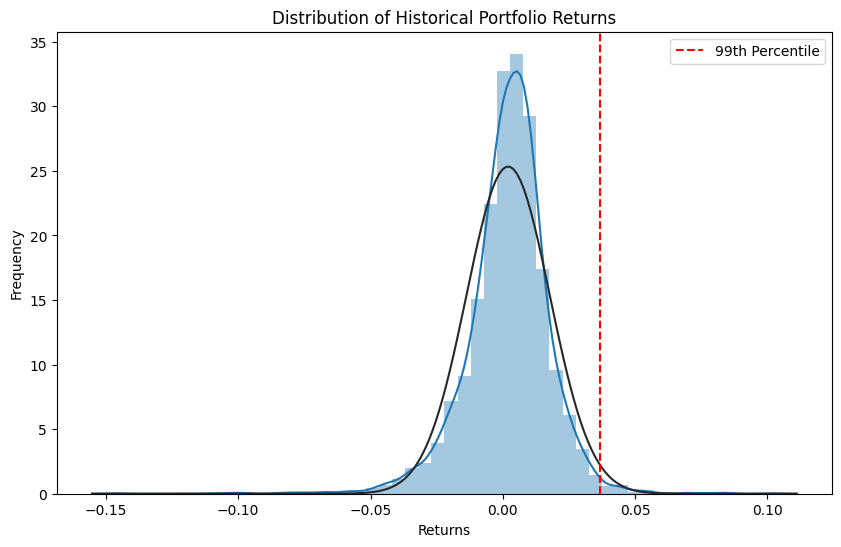

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yf
from scipy.stats import norm

# ... (Your existing code)

# Plot the distribution of historical returns
plt.figure(figsize=(10, 6))
sns.distplot(range_returns, fit=norm, kde=True)  # Use distplot for better visualization
plt.title('Distribution of Historical Portfolio Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')

# Calculate and plot the 99th percentile
percentile_99 = np.percentile(range_returns, 99)
plt.axvline(x=percentile_99, color='r', linestyle='--', label='99th Percentile')
plt.legend()
plt.show()

In [ ]:
#PARAMATRIC METHOD


In [144]:
#create covariance matrix for all the securities
convolution_matrix=log_returns.cov()*252
print(convolution_matrix)

          SPY       BND       GLD       QQQ       VTI
SPY  0.029250  0.000031  0.001466  0.032531  0.029866
BND  0.000031  0.002354  0.002270  0.000253  0.000081
GLD  0.001466  0.002270  0.024127  0.001783  0.001607
QQQ  0.032531  0.000253  0.001783  0.041958  0.033226
VTI  0.029866  0.000081  0.001607  0.033226  0.030740


In [145]:
portfolio_std_dev=np.sqrt(np.dot(weights.T,np.dot(convolution_matrix,weights)))
print(portfolio_std_dev)

0.11569878170830898


In [146]:
confidence_levels=[0.9,0.95,0.99]


In [147]:
from scipy.stats import norm
VaRs=[]
for cl in confidence_levels:
    VaR=portfolio_value*portfolio_std_dev*norm.ppf(cl)*np.sqrt(days/252)
    VaRs.append(VaR)

In [ ]:
#print VaR results


In [151]:
print(f"VaR at {confidence_levels[0]*100}% confidence level: ${VaRs[0]:.2f}")
print('-'*40)
for cl,var in zip(confidence_levels[1:],VaRs[1:]):
    print(f"VaR at {cl*100}% confidence level: ${var:.2f}")

VaR at 90.0% confidence level: $20885.71
----------------------------------------
VaR at 95.0% confidence level: $26806.52
VaR at 99.0% confidence level: $37912.98


In [153]:
print(f'{"Confidence Level":<20}{"Value at Risk:<20"}')
print('_'*40)
#print each confidence interval
for cl , VaR in zip(confidence_levels,VaRs):
    print(f'{cl*100:>6.0f}%:{":<8"}${VaR:>10,.2f}')

Confidence Level    Value at Risk:<20
________________________________________
    90%::<8$ 20,885.71
    95%::<8$ 26,806.52
    99%::<8$ 37,912.98


<ipython-input-155-44cc8ab845f3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(range_returns, fit=norm, kde=True)  # Use distplot for better visualization


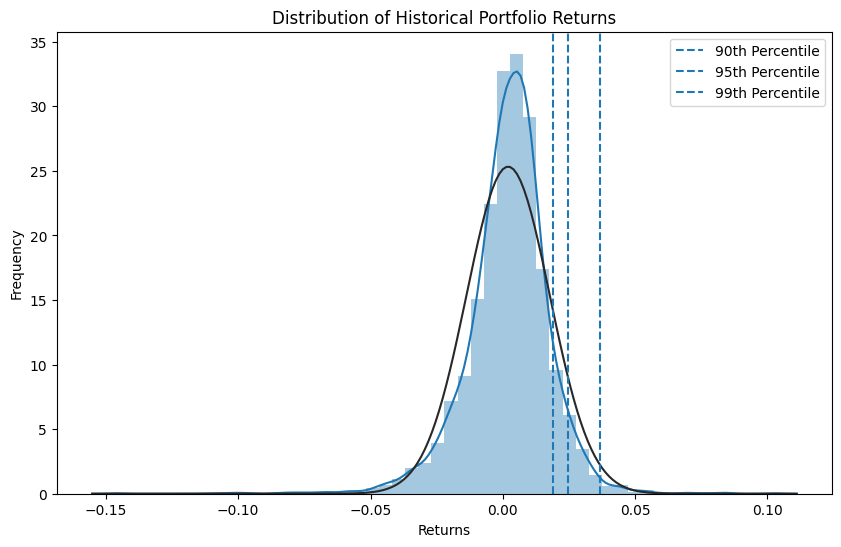

In [155]:
# prompt: draw normal distribution of graph set labels title  and legend for all 95 90 and 99th

# ... (Your existing code)

# Plot the distribution of historical returns
plt.figure(figsize=(10, 6))
sns.distplot(range_returns, fit=norm, kde=True)  # Use distplot for better visualization
plt.title('Distribution of Historical Portfolio Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')

# Calculate and plot percentiles
percentiles = [90, 95, 99]
for percentile in percentiles:
    value = np.percentile(range_returns, percentile)
    plt.axvline(x=value, linestyle='--', label=f'{percentile}th Percentile')

plt.legend()
plt.show()